In [392]:
import numpy as np
import pandas as pd
import matplotlib as plt
import csv
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from scipy import stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, OrdinalEncoder, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [393]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [394]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

In [395]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [396]:
mc = pd.read_csv('mc.csv')

In [397]:
mc.head()
mc.session.value_counts()

Afternoon    228621
Morning      187943
Evening      172637
Night        139967
Name: session, dtype: int64

In [398]:
mc.dtypes

Unnamed: 0             int64
CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
JURISDICTION_CODE    float64
SUSP_AGE_GROUP        object
SUSP_SEX              object
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX               object
year                 float64
month                float64
session               object
session_to            object
diff                  object
diff_min             float64
dtype: object

In [399]:
mc.dropna(subset=['CMPLNT_FR_TM'], inplace = True)

In [400]:
mc.dropna(subset=['PATROL_BORO'], inplace = True)

In [401]:
from datetime import datetime

In [403]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [404]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [405]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 

In [406]:
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

# Label Encoding columns

In [ ]:
mc['RPT_DT'] = pd.to_datetime(mc['RPT_DT'])

In [408]:
# Made a column for Day of week 

mc['reported_dow'] = mc['RPT_DT'].dt.dayofweek

In [409]:
target_transform = LabelEncoder()
mc['session'] = target_transform.fit_transform(mc['session'])
mc.iloc[:,10:]

,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,SUSP_AGE_GROUP,...,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,session,session_to,diff,diff_min,reported_dow
0,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,25-44,...,18-24,WHITE HISPANIC,F,2018.0,6.0,1,Evening,0 days 00:01:00,1.0,6
1,388.0,"ROBBERY,RESIDENTIAL COMMON AREA",COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,25-44,...,<18,WHITE HISPANIC,M,2018.0,11.0,0,Afternoon,0 days 00:10:00,10.0,6
2,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,<18,...,<18,WHITE HISPANIC,F,2018.0,5.0,0,Afternoon,0 days 03:00:00,180.0,0
3,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,18-24,...,65+,BLACK,M,2018.0,12.0,0,Afternoon,0 days 00:15:00,15.0,5
4,175.0,"SEXUAL ABUSE 3,2",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,25-44,...,18-24,BLACK,F,2018.0,9.0,0,Afternoon,0 days 00:15:00,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729163,198.0,CRIMINAL CONTEMPT 1,COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,45-64,...,25-44,WHITE,F,2018.0,10.0,2,Morning,0 days 00:53:00,53.0,3
729164,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,45-64,...,45-64,WHITE,F,2018.0,5.0,2,Morning,0 days 00:10:00,10.0,1
729165,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,25-44,...,45-64,WHITE,F,2018.0,5.0,2,Morning,0 days 00:55:00,55.0,1
729166,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,GAS STATION,N.Y. POLICE DEPT,0.0,18-24,...,45-64,BLACK HISPANIC,M,2018.0,1.0,0,Afternoon,0 days 00:08:00,8.0,2


In [410]:
mc.columns

Index(['Unnamed: 0', 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD',
       'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC',
       'JURISDICTION_CODE', 'SUSP_AGE_GROUP', 'SUSP_SEX', 'Latitude',
       'Longitude', 'Lat_Lon', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX', 'year', 'month', 'session', 'session_to', 'diff', 'diff_min',
       'reported_dow'],
      dtype='object')

In [411]:
mc.shape

(729160, 35)

In [412]:
columns_to_keep = ['ADDR_PCT_CD', 'KY_CD','OFNS_DESC', 'PD_DESC' , 'LAW_CAT_CD', 'BORO_NM', 
                   'LOC_OF_OCCUR_DESC', 'SUSP_AGE_GROUP', 'SUSP_SEX', 'Latitude', 'Longitude',
                  'Lat_Lon', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'year', 
                  'month', 'session', 'session_to', 'diff', 'diff_min' , 'reported_dow']

categorical = ['ADDR_PCT_CD', 'KY_CD','OFNS_DESC', 'PD_DESC', 'LAW_CAT_CD', 'BORO_NM', 
                'LOC_OF_OCCUR_DESC', 'SUSP_AGE_GROUP', 'SUSP_SEX','PATROL_BORO', 'VIC_AGE_GROUP',
               'VIC_RACE', 'VIC_SEX', 'reported_dow', 'session_to']

numerical = ['year', 'month', 'session','diff_min']

In [413]:
#changing sample size to see how the recall changes 
#Looking at recall to determine how accurately the model predicted the attempted crimes

mcsample = mc.sample(100000)

In [414]:
#dropped target from the dataset 
#only include columns that we want in the pipeline

X = mcsample[columns_to_keep]

y = mcsample['CRM_ATPT_CPTD_CD']

In [420]:
#train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [421]:
# baseline Model - K NeighborsClassifier: non-parametric model


numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



KNN_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       KNeighborsClassifier())])  #where to change the model
KNN_pipe

KNN_pipe.fit(X_train,y_train)
KNN_pipe.score(X_test, y_test)

0.9867575757575757

In [446]:
#logistic regression pipeline

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



logreg_pipe = Pipeline([('preprocess', ct),
                ('model1', LogisticRegression(max_iter =10000))]) #where to change the model
logreg_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('model1', LogisticRegression(max_iter=1000))])

In [447]:
logreg_pipe.fit(X_train,y_train)  
logreg_pipe.score(X_test, y_test)

0.9876666666666667

# Logistic Regression 100,000 sample metrics

In [448]:
#worst performing model

predicted = logreg_pipe.predict(X_test)
predicted 

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

   ATTEMPTED       0.83      0.06      0.11       426
   COMPLETED       0.99      1.00      0.99     32574

    accuracy                           0.99     33000
   macro avg       0.91      0.53      0.55     33000
weighted avg       0.99      0.99      0.98     33000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


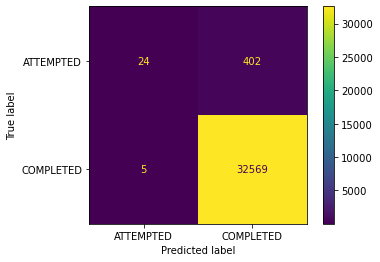

In [449]:
plot_confusion_matrix(logreg_pipe, X_test, y_test)

In [453]:
np.logspace(-4, 4, 50)

array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])

In [455]:
# logistic regression grid search 

logreg_params = {'model1__C' : np.logspace(-4, 4, 50),
                 'model1__penalty':['l1', 'l2']}

logreg_cv = GridSearchCV(estimator = logreg_pipe, param_grid = logreg_params, cv = 5)
logreg_cv.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('onehotnorm',
                                                                                          MaxAbsScaler())]),
                                                                         ['ADDR_PCT_CD',
                                                                          'KY_CD',
                                                                          'OFNS_DESC',
                                                                          'PD_DESC',
                                                                          'LAW_CAT_CD',
                                                                          'BORO_NM',
                                                                          'LOC_OF_OCCUR_DESC',
                                                                          'SUSP_AGE_GROUP',
                                                                          'SUSP_SEX',
                                                                          'PATROL_BORO',
                                                                          '...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'model1__penalty': ['l1', 'l2']})

In [456]:
# Random Forest Classifier with Random OverSampling 

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 

# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



RF_pipe = Pipeline([('preprocess', ct),('ros', RandomOverSampler()),  #tuning the model
                      ('model',
                       RandomForestClassifier())])  #where to change the model
RF_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('ros', RandomOverSampler()),
                ('model', RandomForestClassifier())])

In [457]:
RF_pipe.fit(X_train,y_train)
RF_pipe.score(X_test, y_test)

0.9874242424242424

In [458]:
#classification metrics for random oversampler 

predicted = RF_pipe.predict(X_test)
predicted 

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

   ATTEMPTED       0.58      0.09      0.15       426
   COMPLETED       0.99      1.00      0.99     32574

    accuracy                           0.99     33000
   macro avg       0.79      0.54      0.57     33000
weighted avg       0.98      0.99      0.98     33000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


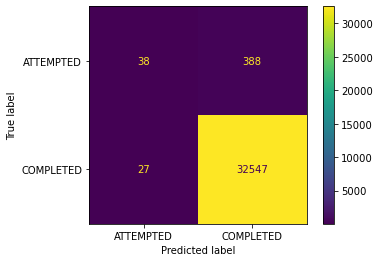

In [459]:
plot_confusion_matrix(RF_pipe, X_test, y_test)

In [469]:
# Random Forest Classifier with SMOTE 

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



RF_pipe_SMOTE = Pipeline([('preprocess', ct),('smote', SMOTE()),
                       ('model', RandomForestClassifier())])  #where you change the model


RF_pipe_SMOTE

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('smote', SMOTE()), ('model', RandomForestClassifier())])

In [470]:
RF_pipe_SMOTE.fit(X_train,y_train)
RF_pipe_SMOTE.score(X_test,y_test)

0.9873939393939394

In [471]:
#classification metrics for random forest with SMOTE

predicted = RF_pipe_SMOTE.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

   ATTEMPTED       0.62      0.06      0.11       426
   COMPLETED       0.99      1.00      0.99     32574

    accuracy                           0.99     33000
   macro avg       0.81      0.53      0.55     33000
weighted avg       0.98      0.99      0.98     33000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


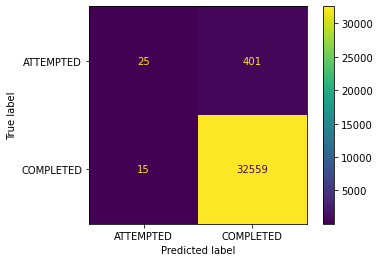

In [472]:
plot_confusion_matrix(RF_pipe_SMOTE, X_test, y_test)

In [474]:
RF_pipe_SMOTE

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('smote', SMOTE()), ('model', RandomForestClassifier())])

In [475]:
RF_pipe_SMOTE.named_steps['model']

RandomForestClassifier()

In [476]:
onehot_cols = RF_pipe_SMOTE.named_steps['preprocess'].named_transformers_['nominalpipe'].named_steps['onehotenc'].get_feature_names_out()

In [477]:
#all feature importances...could use any pipeline to get them

feature_importances = (RF_pipe_SMOTE.steps[2][1].feature_importances_)
pd.DataFrame(list(zip(onehot_cols, feature_importances))).sort_values(by = 1, ascending = False)

,0,1
380,LAW_CAT_CD_FELONY,0.061496
381,LAW_CAT_CD_MISDEMEANOR,0.029171
138,OFNS_DESC_HARRASSMENT 2,0.027334
119,KY_CD_578,0.024055
422,VIC_SEX_F,0.021308
...,...,...
312,"PD_DESC_PROSTITUTION, PATRONIZING 4, 3",0.000000
319,PD_DESC_RECKLESS DRIVING,0.000000
363,PD_DESC_TAMPERING WITH A WITNESS,0.000000
367,"PD_DESC_TRAFFIC,UNCLASSIFIED MISDEMEAN",0.000000


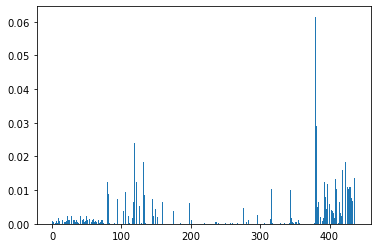

In [510]:
#graph of all feature importances 

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# plot feature importance
pyplot.bar([x for x in range(len(feature_importances))], feature_importances)
pyplot.show()

In [489]:
#list of top 10 most important features
#feature importance values are the absolute value of the coefficients 

feature_importances = (RF_pipe_SMOTE.steps[2][1].feature_importances_)
graph = pd.DataFrame(list(zip(onehot_cols, feature_importances))).sort_values(by = 1, ascending = False).head(10)

In [528]:
graph

,0,1
380,LAW_CAT_CD_FELONY,0.061496
381,LAW_CAT_CD_MISDEMEANOR,0.029171
138,OFNS_DESC_HARRASSMENT 2,0.027334
119,KY_CD_578,0.024055
422,VIC_SEX_F,0.021308
382,LAW_CAT_CD_VIOLATION,0.020843
163,"PD_DESC_ASSAULT 2,1,UNCLASSIFIED",0.020329
423,VIC_SEX_M,0.018454
132,OFNS_DESC_FELONY ASSAULT,0.018294
79,KY_CD_105,0.016483


Text(0.5, 0, 'Features')

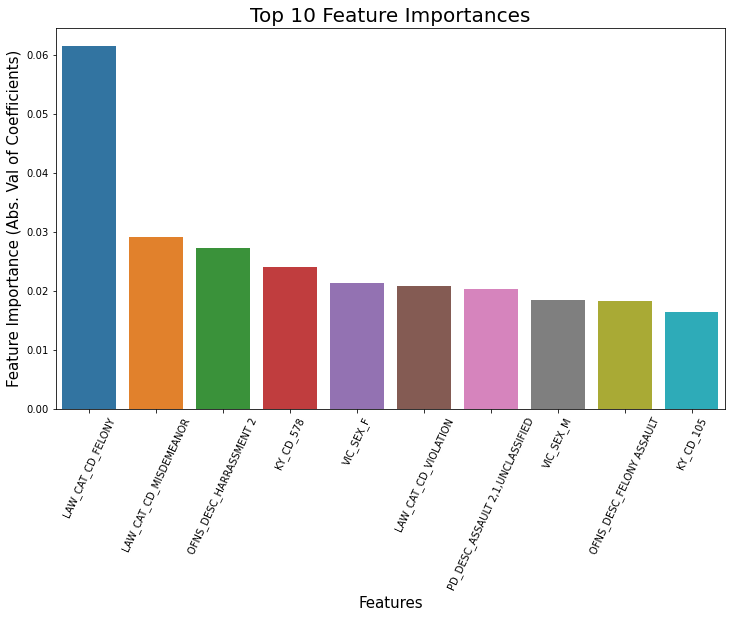

In [533]:
#top 10 feature importances: how it determines whether a crime is attempted or completed 
#KY_CD_578 is Harrassment 2 and KY_CD_105 is Robbery 

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.barplot(x=graph[0], y= graph[1], data=graph)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
ax.set_title('Top 10 Feature Importances', fontsize=20)
ax.set_ylabel('Feature Importance (Abs. Val of Coefficients)', fontsize=15)
ax.set_xlabel('Features', fontsize=15)

# plot feature importance
#pyplot.bar([x for x in range(len(feature_importances))], feature_importances)
#pyplot.show()

In [478]:
#random forest grid search 

rf_params = {'model__n_estimators': [50, 100, 200, 500],
             'model__min_samples_leaf': [1,3,5,7]}
rf_cv = GridSearchCV(estimator = RF_pipe_SMOTE, param_grid = rf_params, cv = 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('onehotnorm',
                                                                                          MaxAbsScaler())]),
                                                                         ['ADDR_PCT_CD',
                                                                          'KY_CD',
                                                                          'OFNS_DESC',
                                                                          'PD_DESC',
                                                                          'LAW_CAT_CD',
                                                                          'BORO_NM',
                                                                          'LOC_OF_OCCUR_DESC',
                                                                          'SUSP_AGE_GROUP',
                                                                          'SUSP_SEX',
                                                                          'PATROL_BORO',
                                                                          'VIC_AGE_GROUP',
                                                                          'VIC_RACE',
                                                                          'VIC_SEX',
                                                                          'reported_dow',
                                                                          'session_to']),
                                                                        ('numpipe',
                                                                         Pipeline(steps=[('numnorm',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'month',
                                                                          'session',
                                                                          'diff_min'])])),
                                       ('smote', SMOTE()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__min_samples_leaf': [1, 3, 5, 7],
                         'model__n_estimators': [50, 100, 200, 500]})

In [517]:
rf_cv.best_score_   #gives score on best estimation for these numbers 

0.9876567164179105

In [518]:
rf_cv.best_params_  #shows you the numbers that work best for the grid search 

{'model__min_samples_leaf': 1, 'model__n_estimators': 500}

In [346]:
best_rf_model = rf_cv.best_estimator_
best_rf_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('model', RandomForestClassifier(n_estimators=500))])

In [511]:
#Random Forest - with undersampling 

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



RF_pipe_under = Pipeline([('preprocess', ct),('ros', RandomUnderSampler()),  #tuning the model
                      ('model',
                       RandomForestClassifier())])  #change the model
RF_pipe_under

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('ros', RandomUnderSampler()),
                ('model', RandomForestClassifier())])

In [512]:
RF_pipe_under.fit(X_train,y_train)
RF_pipe_under.score(X_test, y_test)

0.8309090909090909

# Random Forest Undersampler 100,000 sample metrics

In [513]:
#best model

predicted = RF_pipe_under.predict(X_test)
predicted 

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

   ATTEMPTED       0.06      0.79      0.11       426
   COMPLETED       1.00      0.83      0.91     32574

    accuracy                           0.83     33000
   macro avg       0.53      0.81      0.51     33000
weighted avg       0.98      0.83      0.90     33000



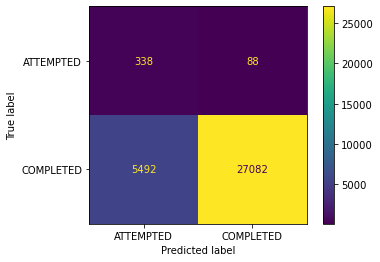

In [515]:
#confusion matric RF Undersampler

plot_confusion_matrix(RF_pipe_under, X_test, y_test)

In [521]:
mc.to_csv('mc.csv')